# Life Expectancy Project 

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from scipy.stats.mstats import winsorize
import math
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_csv("dataset/life-expectancy-data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [6]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [9]:
df.shape

(2938, 22)

In [11]:
df.rename(columns = {" BMI " :"bmi",
                     "Life expectancy ": "life_expectancy",
                     "Adult Mortality":"adult_mortality",
                     "infant deaths":"infant_deaths",
                     "percentage expenditure":"percentage_expenditure",
                     "Hepatitis B":"hepatitis_b",
                     "Measles ":"measles",
                     "under-five deaths ": "under_five_deaths",
                     "Total expenditure":"total_expenditure",
                     "Diphtheria ": "diphtheria",
                     " thinness  1-19 years":"thinness_1-19_years",
                     " thinness 5-9 years":"thinness_5-9_years",
                     " HIV/AIDS":"hiv/aids",
                     "Income composition of resources":"income_composition_of_resources"}, inplace = True)

In [13]:
df.columns

Index(['Country', 'Year', 'Status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'Polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'GDP', 'Population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'Schooling'],
      dtype='object')

In [15]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
Polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
GDP                                448
Population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
income_composition_of_resources    167
Schooling                          163
dtype: int64

In [18]:
imputed_data = []
for year in list(df.Year.unique()):
    year_data = df[df.Year == year].copy()
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
    imputed_data.append(year_data)

df2 = pd.concat(imputed_data).copy()
print(df2.isnull().sum())

Country                            0
Year                               0
Status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under_five_deaths                  0
Polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
GDP                                0
Population                         0
thinness_1-19_years                0
thinness_5-9_years                 0
income_composition_of_resources    0
Schooling                          0
dtype: int64


In [40]:
df2.describe()

,Year,life_expectancy,adult_mortality,infant_deaths,Alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,Polio,total_expenditure,diphtheria,hiv/aids,GDP,Population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.231777,164.741882,30.303948,4.644013,738.251295,80.322757,2419.592240,38.323713,42.035739,82.536808,6.007815,82.305166,1.742103,7481.955600,1.275499e+07,4.839464,4.870027,0.627686,11.993407
std,4.613841,9.508362,124.083816,117.926501,3.919849,1987.914858,22.682329,11467.272489,19.929396,160.445548,23.353973,2.416215,23.642961,5.077785,13159.210856,5.384718e+07,4.394616,4.482803,0.205212,3.268724
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,74.099237,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.140000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.910000,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.673000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7464.487887,1.181332e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


/Users/sam/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sam/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sam/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/

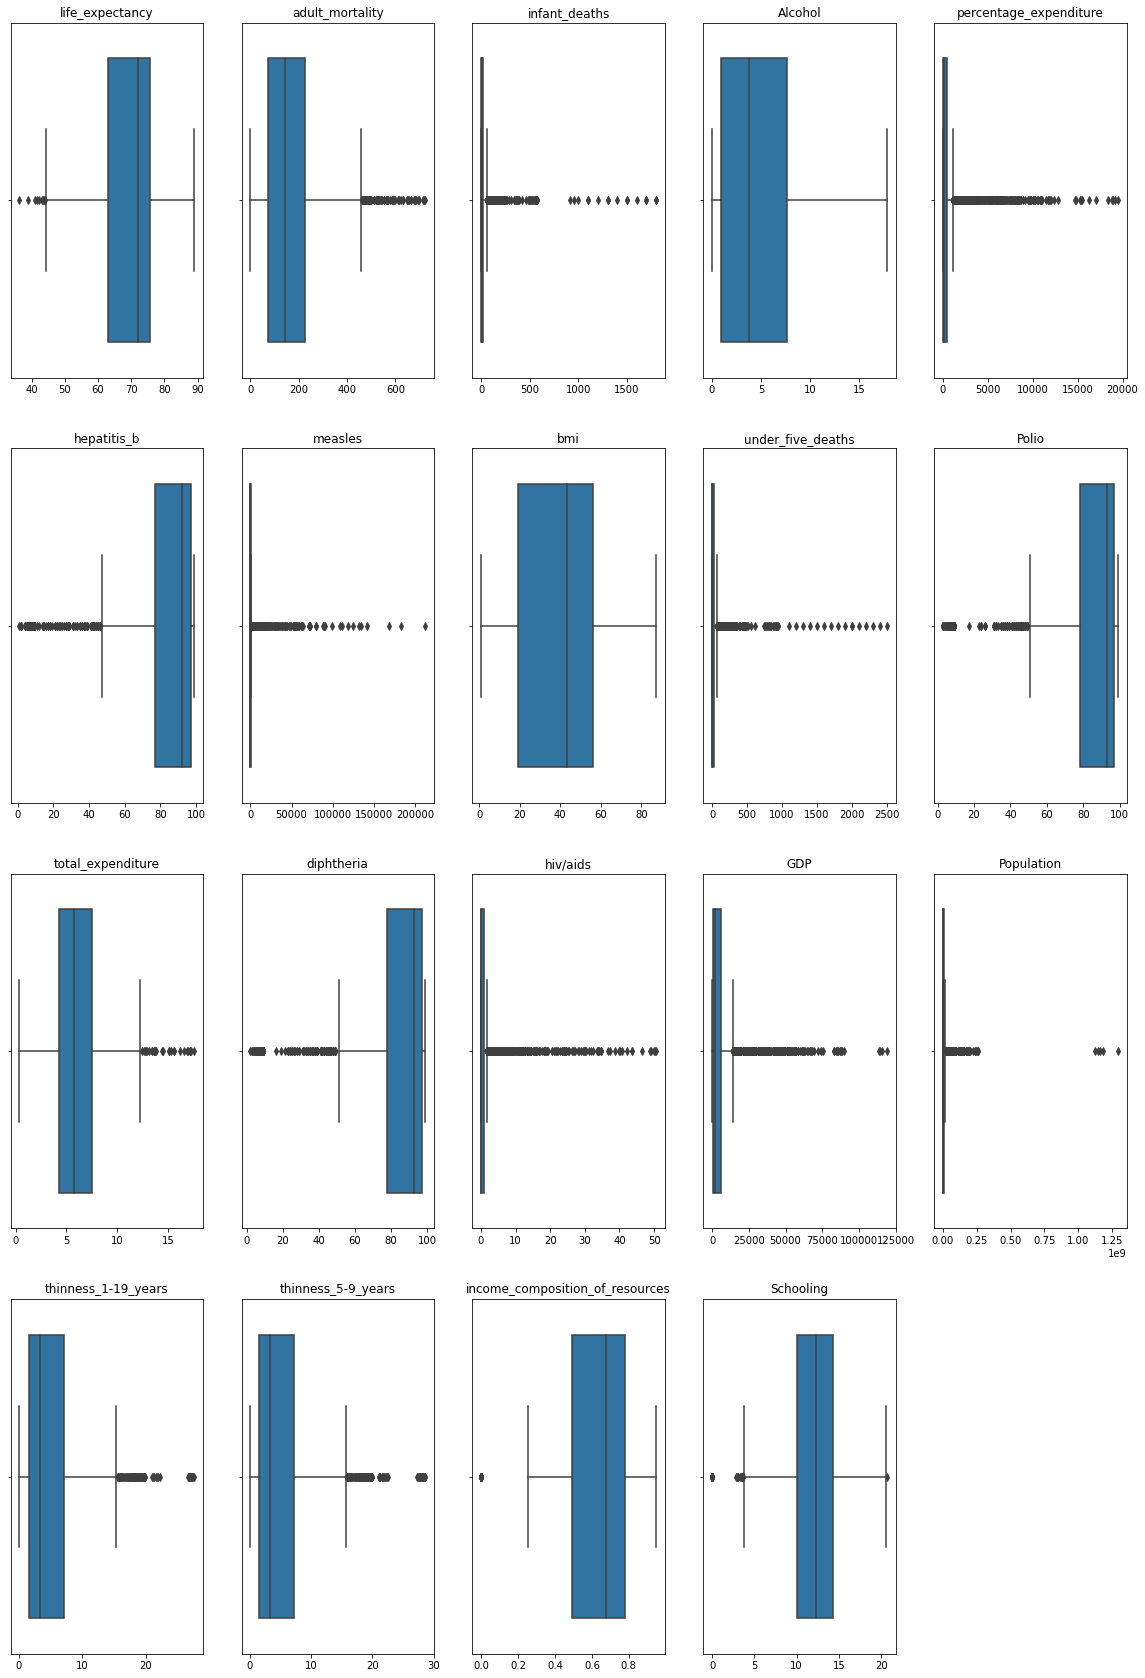

In [42]:
col_dict = {'life_expectancy':1,
            'adult_mortality':2,
            'infant_deaths':3,
            'Alcohol':4,
            'percentage_expenditure':5,
            'hepatitis_b':6,
            'measles':7,
            'bmi':8,
            'under_five_deaths':9,
            'Polio':10,
            'total_expenditure':11,
            'diphtheria':12,
            'hiv/aids':13,
            'GDP':14,
            'Population':15,
            'thinness_1-19_years':16,
            'thinness_5-9_years':17,
            'income_composition_of_resources':18,
            'Schooling':19}

plt.figure(figsize=(20,30))
for col, i in col_dict.items():
    plt.subplot(4,5,i)
    sns.boxplot(df[col]).set(xlabel=None)
    plt.title(col)

plt.show()

In [25]:
# Count Outliers
def OutlierCounter(col):
    print(15*'-' + col + 15*'-')
    q25, q75 = np.nanquantile(df2[col], [.25,.75])
    IQR = q75-q25
    minval = q25 - (1.5*IQR)
    maxval = q75 + (1.5*IQR)
    outlier_count = len(np.where((df2[col] > maxval) | (df2[col] < minval))[0])
    outlier_percent = round(outlier_count / len(df2[col]*100),2)
    print("Outlier Counts: {}".format(outlier_count))
    print("Outlier Percentage: {}".format(outlier_percent))
    
cont_vars = df2.columns[3:]

for cols in cont_vars:
    OutlierCounter(cols)


---------------life_expectancy---------------
Outlier Counts: 17
Outlier Percentage: 0.01
---------------adult_mortality---------------
Outlier Counts: 86
Outlier Percentage: 0.03
---------------infant_deaths---------------
Outlier Counts: 315
Outlier Percentage: 0.11
---------------Alcohol---------------
Outlier Counts: 3
Outlier Percentage: 0.0
---------------percentage_expenditure---------------
Outlier Counts: 389
Outlier Percentage: 0.13
---------------hepatitis_b---------------
Outlier Counts: 222
Outlier Percentage: 0.08
---------------measles---------------
Outlier Counts: 542
Outlier Percentage: 0.18
---------------bmi---------------
Outlier Counts: 0
Outlier Percentage: 0.0
---------------under_five_deaths---------------
Outlier Counts: 394
Outlier Percentage: 0.13
---------------Polio---------------
Outlier Counts: 279
Outlier Percentage: 0.09
---------------total_expenditure---------------
Outlier Counts: 51
Outlier Percentage: 0.02
---------------diphtheria---------------


In [30]:
#winsorize the data
df_clean = pd.DataFrame()
df_clean = df2[["Country", "Year", "Status"]].copy()
df_clean[cont_vars[0]] = winsorize(df2[cont_vars[0]], (0.01,0))  
df_clean[cont_vars[1]] = winsorize(df2[cont_vars[1]], (0,0.03))  
df_clean[cont_vars[2]] = winsorize(df2[cont_vars[2]], (0,0.11))  
df_clean[cont_vars[3]] = winsorize(df2[cont_vars[3]], (0,0.01))  
df_clean[cont_vars[4]] = winsorize(df2[cont_vars[4]], (0,0.14))  
df_clean[cont_vars[5]] = winsorize(df2[cont_vars[5]], (0.08,0))  
df_clean[cont_vars[6]] = winsorize(df2[cont_vars[6]], (0,0.19))  
df_clean[cont_vars[7]] = winsorize(df2[cont_vars[7]], (0,0))  
df_clean[cont_vars[8]] = winsorize(df2[cont_vars[8]], (0,0.14))  
df_clean[cont_vars[9]] = winsorize(df2[cont_vars[9]], (0.1,0)) 
df_clean[cont_vars[10]] = winsorize(df2[cont_vars[10]], (0,0.03))
df_clean[cont_vars[11]] = winsorize(df2[cont_vars[11]], (0.11,0))
df_clean[cont_vars[12]] = winsorize(df2[cont_vars[12]], (0,0.19))   
df_clean[cont_vars[13]] = winsorize(df2[cont_vars[13]], (0,0.11))  
df_clean[cont_vars[14]] = winsorize(df2[cont_vars[14]], (0,0.08))  
df_clean[cont_vars[15]] = winsorize(df2[cont_vars[15]], (0,0.04))  
df_clean[cont_vars[16]] = winsorize(df2[cont_vars[16]], (0,0.04))
df_clean[cont_vars[17]] = winsorize(df2[cont_vars[17]], (0.05,0))
df_clean[cont_vars[18]] = winsorize(df2[cont_vars[18]], (0.03,0.01))

/Users/sam/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sam/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sam/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/

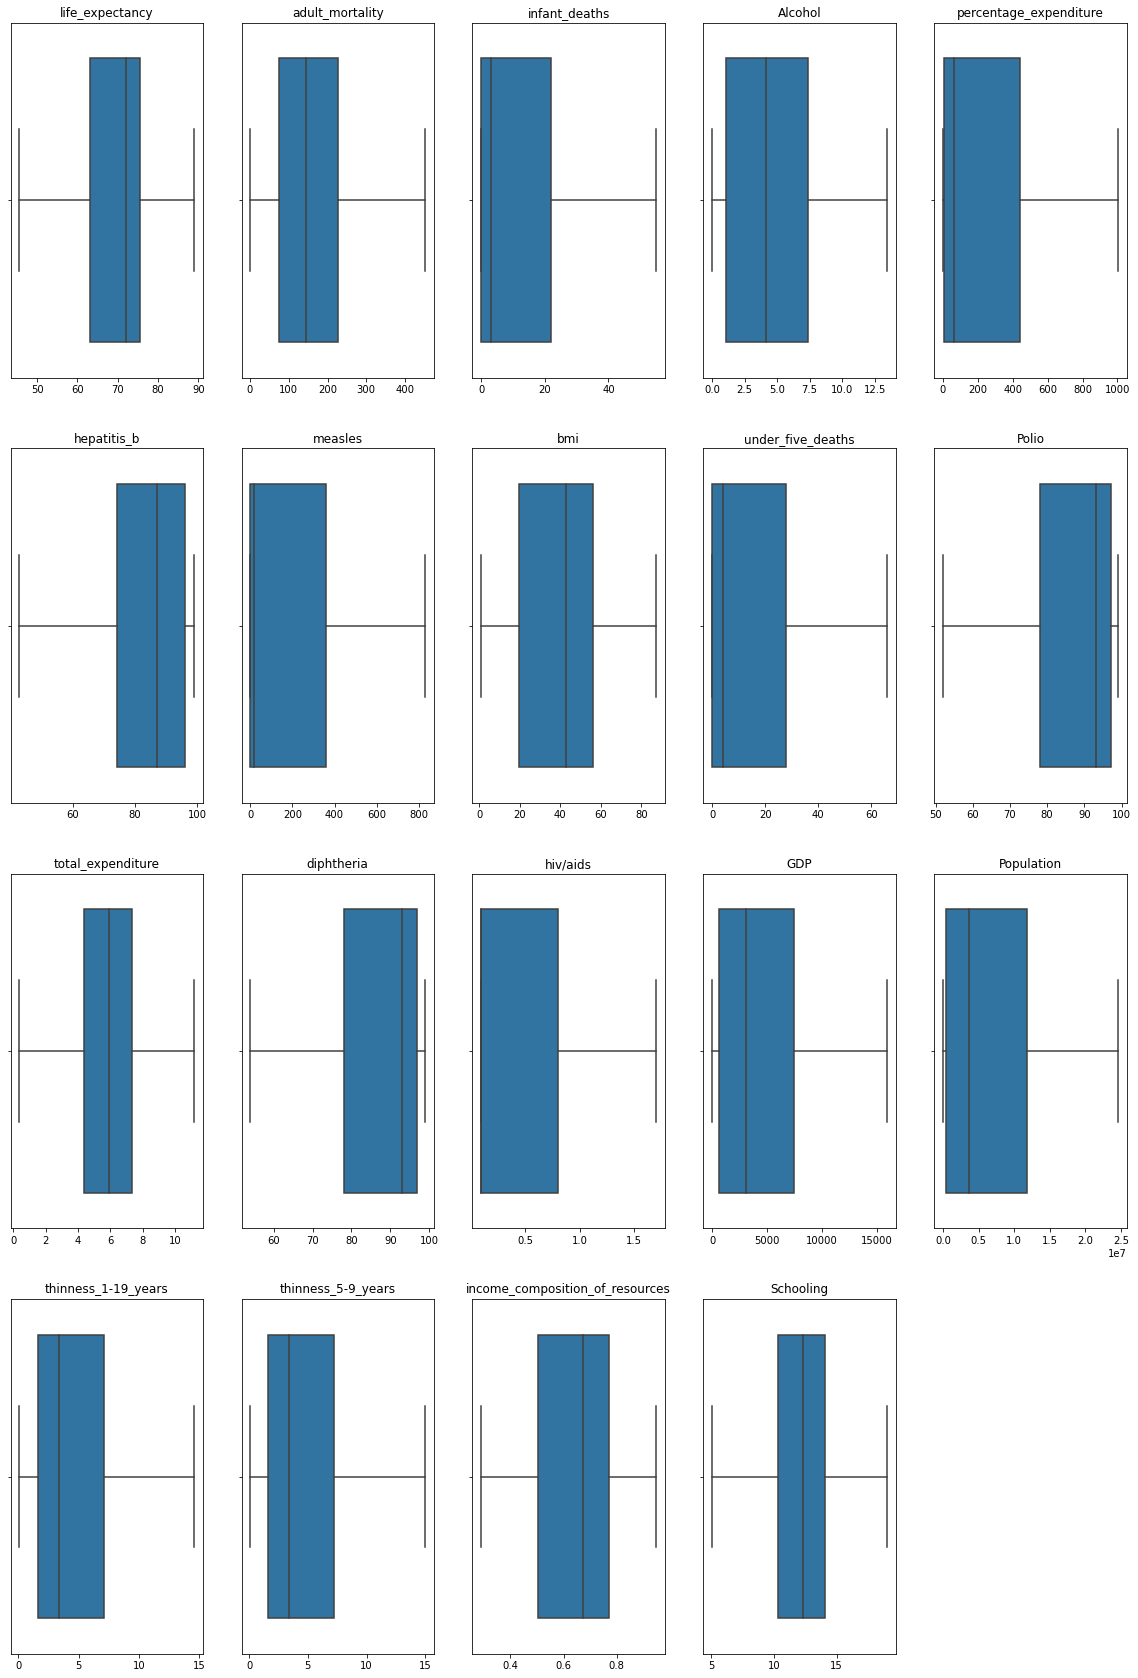

In [31]:
#plot the data after winsorized
plt.figure(figsize=(20,30))
for col, i in col_dict.items():
    plt.subplot(4,5,i)
    sns.boxplot(df_clean[col]).set(xlabel=None)
    plt.title(col)
plt.show()

In [ ]:
# def cap_data(df):
#     for col in df.columns:
#         print("capping the ",col)
#         if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
#             percentiles = df[col].quantile([0.01,0.99]).values
#             df[col][df[col] <= percentiles[0]] = percentiles[0]
#             df[col][df[col] >= percentiles[1]] = percentiles[1]
#         else:
#             df[col]=df[col]
#     return df

# final_df=cap_data(df)

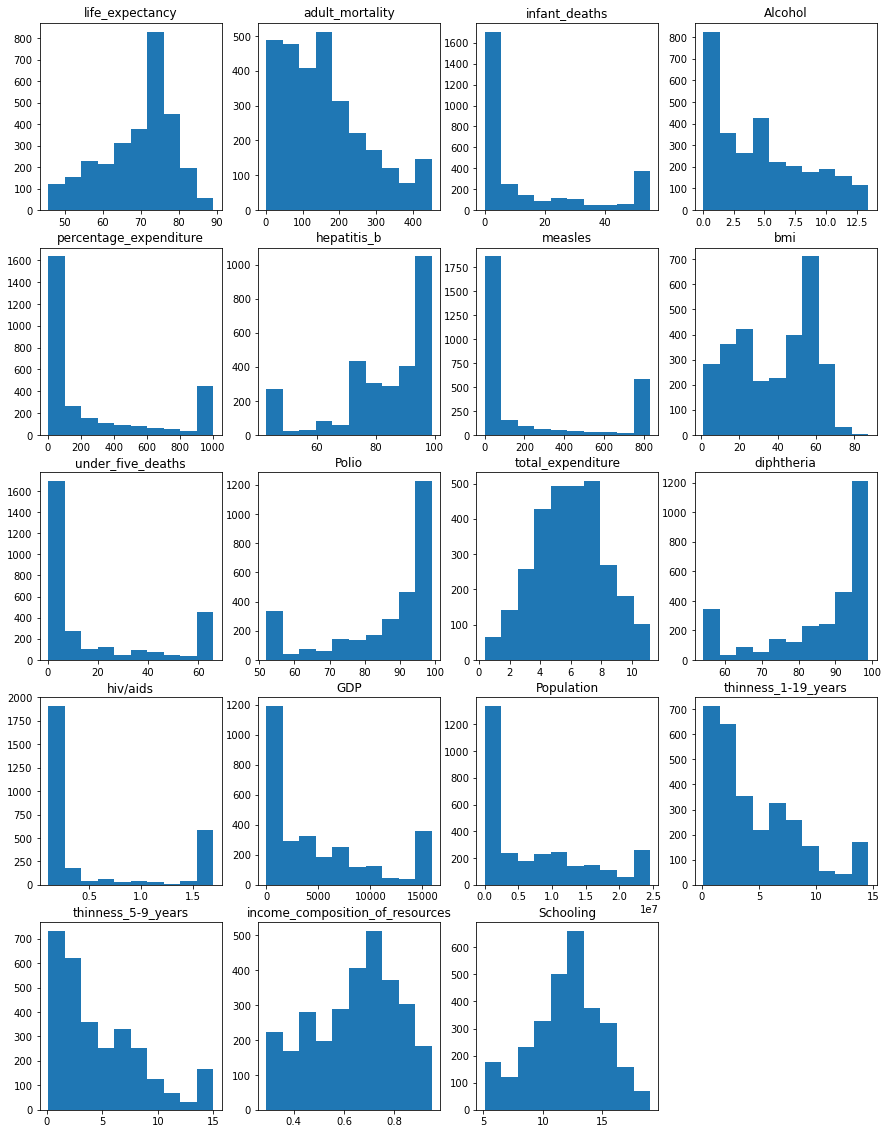

In [32]:
# Histogram
plt.figure(figsize=(15, 20))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(5, 4, i)
    plt.hist(df_clean.iloc[:,3:][col])
    plt.title(col)


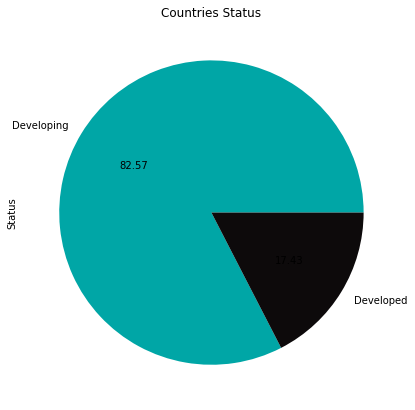

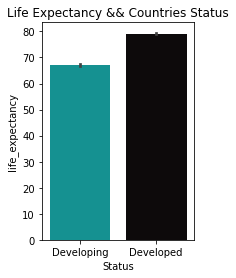

In [57]:
colors = ['#00A6A6', '#0D0A0B']
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
df_clean.Status.value_counts().plot(kind='pie', autopct='%.2f', colors = colors)
plt.title('Countries Status')
plt.savefig('national_pie.png')
plt.show()

plt.subplot(1,2,2)
sns.barplot(x="Status", y="life_expectancy", data=df_clean, palette=colors)
plt.title("Life Expectancy && Countries Status")
plt.savefig('life_status.png')
plt.show()

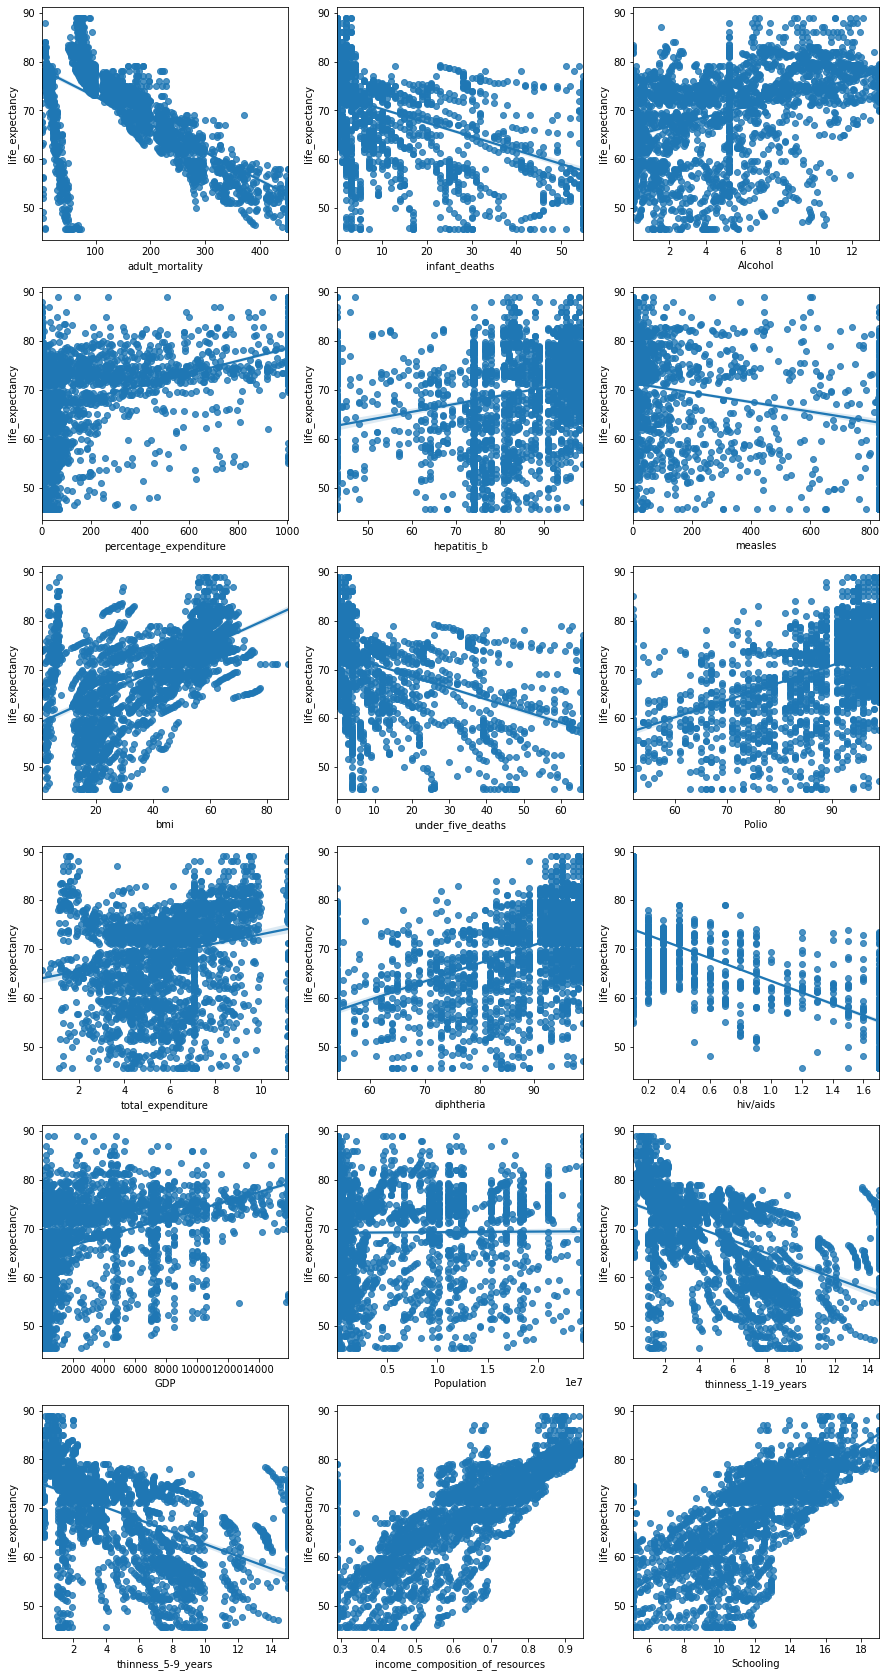

In [62]:
plt.figure(figsize=(15,30))
for i in range(1,19):
    plt.subplot(6,3,i)
    sns.regplot(x=df_clean.columns[i+3],y='life_expectancy',data=df_clean)

In [64]:
df_clean

,Country,Year,Status,life_expectancy,adult_mortality,infant_deaths,Alcohol,percentage_expenditure,hepatitis_b,measles,...,Polio,total_expenditure,diphtheria,hiv/aids,GDP,Population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,55,0.010000,71.279624,65.000000,831,...,52.0,8.16,65.0,0.1,584.259210,2.457751e+07,14.6,15.0,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.600000,364.975229,99.000000,0,...,99.0,6.00,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,5.288333,0.000000,95.000000,63,...,95.0,7.08,95.0,0.1,4132.762920,2.457751e+07,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,55,5.288333,0.000000,64.000000,118,...,52.0,7.08,64.0,1.7,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,5.288333,0.000000,99.000000,0,...,86.0,7.08,99.0,0.2,13566.954100,1.109741e+07,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,Venezuela (Bolivarian Republic of),2000,Developing,72.5,168.0,11,8.010000,0.000000,43.000000,22,...,86.0,4.91,77.0,0.1,4708.515191,9.440444e+06,1.8,1.7,0.670,10.6
2889,Viet Nam,2000,Developing,73.4,139.0,33,1.600000,0.000000,74.035294,831,...,96.0,4.89,96.0,0.1,4708.515191,9.440444e+06,14.6,15.0,0.569,10.4
2905,Yemen,2000,Developing,68.0,252.0,48,0.070000,0.000000,43.000000,0,...,74.0,4.14,74.0,0.1,4708.515191,9.440444e+06,14.1,14.1,0.436,7.7
2921,Zambia,2000,Developing,45.6,452.0,44,2.620000,45.616880,74.035294,831,...,85.0,7.16,85.0,1.7,341.955625,1.531221e+06,7.5,7.5,0.418,9.6


In [70]:
df2 = df_clean.groupby('Country').mean()
df2

,Year,life_expectancy,adult_mortality,infant_deaths,Alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,Polio,total_expenditure,diphtheria,hiv/aids,GDP,Population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,2007.5,58.19375,269.0625,55.0000,0.014375,34.960110,64.562500,759.8750,15.51875,66.0000,58.6875,8.252500,60.5000,0.10000,340.015425,8.825232e+06,13.05000,12.63125,0.415375,8.21250
Albania,2007.5,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,2007.5,73.61875,108.1875,20.3125,0.711771,236.185241,81.475909,351.9375,48.74375,23.5000,91.7500,4.758750,91.8750,0.10000,2847.853392,1.506937e+07,6.09375,5.97500,0.694875,12.71250
Angola,2007.5,49.03750,328.5625,55.0000,5.712396,102.100268,73.212854,661.0000,18.01875,66.0000,61.4375,4.116875,62.6250,1.70000,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.07500
Antigua and Barbuda,2007.5,75.05625,127.5000,0.0000,7.783021,621.320041,96.752206,0.0000,38.42500,0.0000,96.9375,4.934375,98.3125,0.12500,9759.305728,1.275636e+07,3.42500,3.37500,0.597750,10.75625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2007.5,73.38750,163.0000,9.3750,7.286771,0.000000,70.937500,67.4375,54.48750,10.7500,77.4375,5.128750,74.5000,0.10000,7479.664890,1.275636e+07,1.65000,1.56250,0.726812,12.78750
Viet Nam,2007.5,74.77500,126.5625,29.1875,3.224896,0.000000,85.157207,628.6875,11.18750,36.5000,94.9375,6.046250,91.7500,0.14375,7479.664890,1.275636e+07,14.50625,14.94375,0.627063,11.51250
Yemen,2007.5,63.86250,211.8125,39.3750,0.374896,0.000000,62.250000,540.3125,33.48750,51.6250,69.8750,5.135000,72.6250,0.10000,7479.664890,1.275636e+07,13.83125,13.75000,0.475500,8.50625


In [71]:
df3 = df_clean[['Country','Status', 'life_expectancy']]
df3

,Country,Status,life_expectancy
0,Afghanistan,Developing,65.0
16,Albania,Developing,77.8
32,Algeria,Developing,75.6
48,Angola,Developing,52.4
64,Antigua and Barbuda,Developing,76.4
...,...,...,...
2873,Venezuela (Bolivarian Republic of),Developing,72.5
2889,Viet Nam,Developing,73.4
2905,Yemen,Developing,68.0
2921,Zambia,Developing,45.6


In [72]:
df4 = df3.loc[df3['Status'] == 'Developing']
df4

,Country,Status,life_expectancy
0,Afghanistan,Developing,65.0
16,Albania,Developing,77.8
32,Algeria,Developing,75.6
48,Angola,Developing,52.4
64,Antigua and Barbuda,Developing,76.4
...,...,...,...
2873,Venezuela (Bolivarian Republic of),Developing,72.5
2889,Viet Nam,Developing,73.4
2905,Yemen,Developing,68.0
2921,Zambia,Developing,45.6


In [74]:
df4 = df4.groupby('Country').mean()
df4.describe()

,life_expectancy
count,161.000000
mean,67.387062
std,8.379913
min,47.518750
25%,60.862500
50%,70.356250
75%,73.618750
max,82.218750


In [76]:
dev_std = df4.life_expectancy.std()
dev_mean = df4.life_expectancy.mean()
dev_std

8.379913454809248

In [85]:
sample = df4.life_expectancy.sample(40)
sample_mean = sample.mean()
sample.describe()

count    40.000000
mean     65.924736
std       9.072070
min      47.518750
25%      56.423438
50%      69.974283
75%      73.310938
max      81.687500
Name: life_expectancy, dtype: float64

In [87]:
sample_count = len(sample)
sample_mean_std = dev_std / math.sqrt(sample_count)
sample_mean_std

1.3249806556143855

In [88]:
z_test = (sample_mean - dev_mean)/ sample_mean_std
z_test

-1.1036578927337166

<AxesSubplot:>

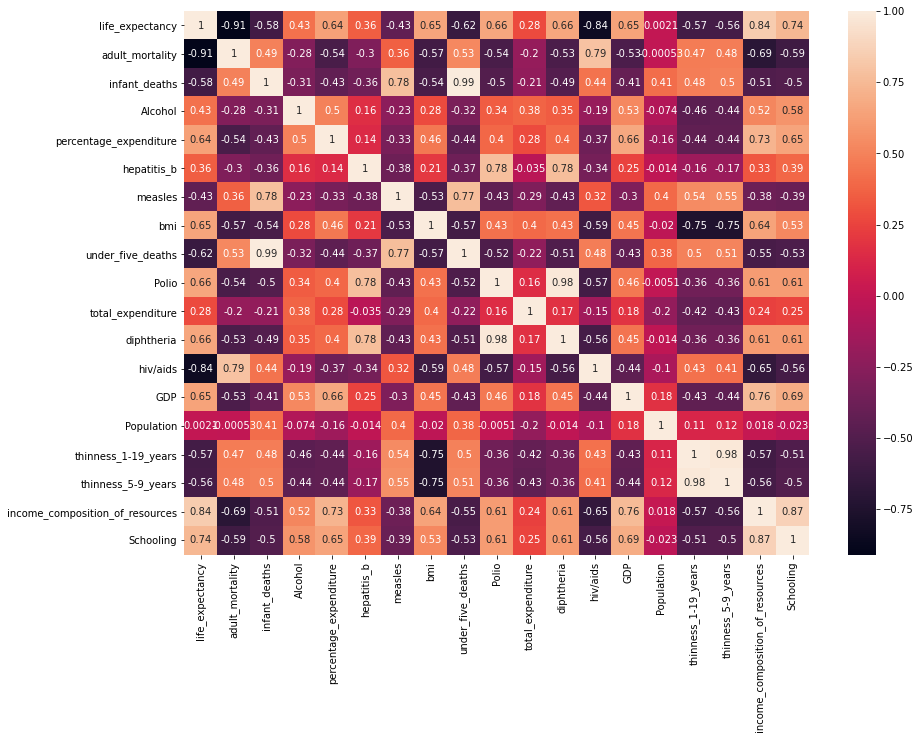

In [92]:
plt.figure(figsize = (14, 10))
sns.heatmap(df2.corr(), annot = True)

In [93]:
corr_df = pd.DataFrame(columns = ['r', 'p-value'])

In [97]:
for col in df2: 
    if pd.api.types.is_numeric_dtype(df2[col]): 
        r,p = stats.pearsonr(df2.life_expectancy, df2[col])
        corr_df.loc[col] = [round(r,3), round(p,5)]

corr_df

,r,p-value
life_expectancy,1.000,0.00000
adult_mortality,-0.909,0.00000
infant_deaths,-0.580,0.00000
Alcohol,0.433,0.00000
percentage_expenditure,0.635,0.00000
hepatitis_b,0.356,0.00000
measles,-0.432,0.00000
bmi,0.650,0.00000
under_five_deaths,-0.619,0.00000
Polio,0.660,0.00000


Text(0, 0.5, 'Life Expectancy')

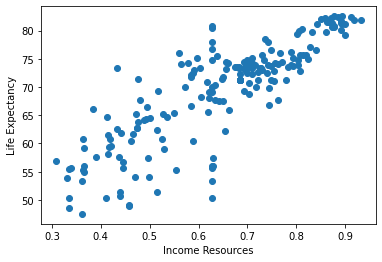

In [98]:
plt.scatter(df2['income_composition_of_resources'], df2['life_expectancy'])
plt.xlabel('Income Resources')
plt.ylabel('Life Expectancy')

Text(0, 0.5, 'Life Expectancy')

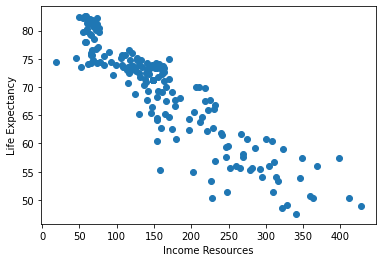

In [99]:
plt.scatter(df2['adult_mortality'], df2['life_expectancy'])
plt.xlabel('Income Resources')
plt.ylabel('Life Expectancy')

Text(0, 0.5, 'Life Expectancy')

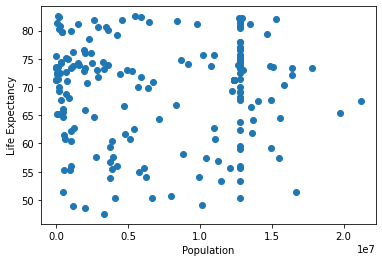

In [100]:
plt.scatter(df2['Population'], df2['life_expectancy'])
plt.xlabel('Population')
plt.ylabel('Life Expectancy')

Text(0, 0.5, 'Life Expectancy')

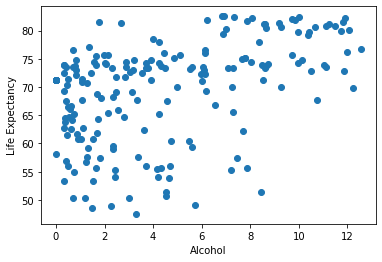

In [101]:
plt.scatter(df2['Alcohol'], df2['life_expectancy'])
plt.xlabel('Alcohol')
plt.ylabel('Life Expectancy')

Text(0, 0.5, 'Life Expectancy')

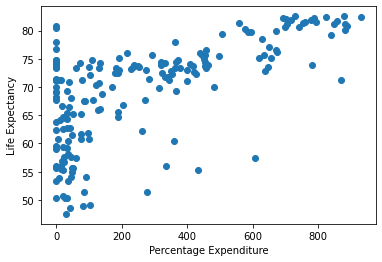

In [102]:
plt.scatter(df2['percentage_expenditure'], df2['life_expectancy'])
plt.xlabel('Percentage Expenditure')
plt.ylabel('Life Expectancy')

In [105]:
df5 = df2[['life_expectancy','adult_mortality']]
df5

,life_expectancy,adult_mortality
Country,,
Afghanistan,58.19375,269.0625
Albania,75.15625,45.0625
Algeria,73.61875,108.1875
Angola,49.03750,328.5625
Antigua and Barbuda,75.05625,127.5000
...,...,...
Venezuela (Bolivarian Republic of),73.38750,163.0000
Viet Nam,74.77500,126.5625
Yemen,63.86250,211.8125


In [106]:
reg = linear_model.LinearRegression()
reg.fit(df5[['adult_mortality']], df5.life_expectancy)

LinearRegression()

In [107]:
reg.predict([[270]])

array([59.13426396])

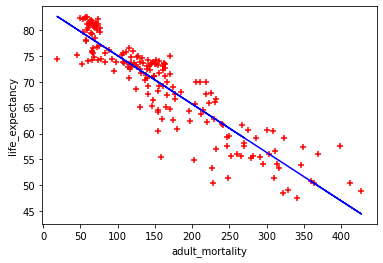

In [109]:
%matplotlib inline
plt.xlabel('adult_mortality')
plt.ylabel('life_expectancy')
plt.scatter(df5.adult_mortality,df5.life_expectancy,color='red',marker='+')
plt.plot(df5.adult_mortality, reg.predict(df5[['adult_mortality']]), color= 'blue')

In [110]:
reg2 = linear_model.LinearRegression()
reg2.fit(df2[['adult_mortality', 'percentage_expenditure', 'Schooling']], df2.life_expectancy)

LinearRegression()

In [111]:
reg2.score(df2[['adult_mortality', 'percentage_expenditure', 'Schooling']], df2.life_expectancy)

0.8935867193765213

In [112]:
reg2.predict([[220, 73.5, 8.5]])

array([61.67089651])

In [114]:
# Splitting the data into X and y
X=df2.drop('life_expectancy',axis=1)
y=df2['life_expectancy']

In [115]:
# Splitting the data into Train and Test Splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [116]:
X_train

,adult_mortality,infant_deaths,Alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,Polio,total_expenditure,diphtheria,hiv/aids,GDP,Population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,Schooling
Country,,,,,,,,,,,,,,,,,,
Turkmenistan,214.8125,6.5625,2.819271,187.781988,94.374574,15.1250,38.11875,8.0625,95.5625,3.094375,96.3750,0.10000,2511.611540,2.635550e+06,3.33750,3.36250,0.411688,10.15000
Ghana,180.0625,40.3125,1.519896,77.249122,76.999574,405.3750,21.72500,59.8125,84.4375,4.500625,82.4375,1.45625,834.376101,1.105332e+07,7.65000,7.57500,0.525875,9.51250
Cyprus,54.1250,0.0000,9.949896,587.672914,92.625000,1.9375,53.16250,0.0000,98.0000,6.780000,98.0000,0.10000,9266.771098,3.902744e+05,0.90625,1.00000,0.833063,13.51875
Antigua and Barbuda,127.5000,0.0000,7.783021,621.320041,96.752206,0.0000,38.42500,0.0000,96.9375,4.934375,98.3125,0.12500,9759.305728,1.275636e+07,3.42500,3.37500,0.597750,10.75625
Belgium,70.1875,0.2500,10.683021,699.389023,81.437500,81.5625,50.89375,1.0000,97.7500,6.031875,97.3125,0.10000,8475.823748,2.884043e+06,0.86250,0.85625,0.877750,16.78750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Georgia,114.9375,1.1875,5.602396,99.525714,77.250000,301.8125,47.74375,1.2500,83.8750,7.315000,86.3750,0.10000,2158.280869,1.015238e+04,2.75000,2.89375,0.696125,12.67500
Guinea-Bissau,158.3125,4.5625,2.449271,21.961645,79.039671,142.4375,19.43125,7.3125,74.7500,5.946250,71.5000,1.70000,384.214931,9.818832e+05,7.50000,7.38125,0.363313,8.28750
Israel,59.5000,0.9375,2.671771,557.533424,97.437500,132.6875,54.98750,1.0000,94.2500,7.453750,91.8125,0.10000,10628.373929,2.786288e+04,1.14375,1.10000,0.873188,15.71250


In [120]:
models = { "Linear Regression": LinearRegression(), 
           "Random Forest": RandomForestRegressor(),
           "Decision tree": DecisionTreeRegressor()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(101)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [121]:
# Evaluate the Model Scores
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Linear Regression': 0.9112026560432317,
 'Random Forest': 0.9263508299213773,
 'Decision tree': 0.9038006102877357}

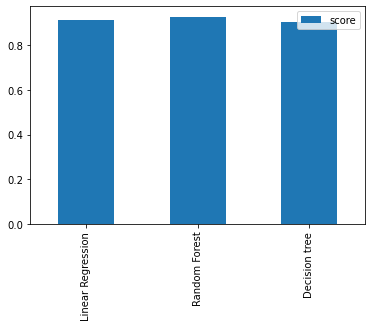

In [122]:
model_compare = pd.DataFrame(model_scores, index=['score'])
model_compare.T.plot.bar();